<a href="https://colab.research.google.com/github/satanimeet/customerchurn/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTEENN
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

In [3]:

path=('/content/drive/MyDrive/heart_disease.csv')
heart = pd.read_csv(path)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print(len(heart))

303


In [5]:
disease_percentage = (heart['target'].value_counts(normalize=True) * 100)
disease_percentage

,proportion
target,
0,54.125413
1,45.874587


In [6]:
if 'restecg' in heart.columns and 'target' in heart.columns:
   restecgtarget = heart.groupby(['restecg', 'target']).size().unstack(fill_value=0)
   restecgtarget['Total'] = restecgtarget.sum(axis=1)
   restecgtarget['target Percentage'] = (restecgtarget[1] / restecgtarget['Total']) * 100
   print(restecgtarget)


target    0   1  Total  target Percentage
restecg                                  
0        95  56    151          37.086093
1         1   3      4          75.000000
2        68  80    148          54.054054


In [7]:
if 'ca' in heart.columns and 'target' in heart.columns:
   catarget = heart.groupby(['ca', 'target']).size().unstack(fill_value=0)
   catarget['Total'] = catarget.sum(axis=1)
   catarget['target Percentage'] = (catarget[1] / catarget['Total']) * 100
   print(catarget)

target    0   1  Total  target Percentage
ca                                       
0       133  47    180          26.111111
1        21  44     65          67.692308
2         7  31     38          81.578947
3         3  17     20          85.000000


In [8]:
if 'slope' in heart.columns and 'target' in heart.columns:
   slopetarget = heart.groupby(['slope', 'target']).size().unstack(fill_value=0)
   slopetarget['Total'] = slopetarget.sum(axis=1)
   slopetarget['target Percentage'] = (slopetarget[1] / slopetarget['Total']) * 100
   print(slopetarget)

target    0   1  Total  target Percentage
slope                                    
0       106  36    142          25.352113
1        49  91    140          65.000000
2         9  12     21          57.142857


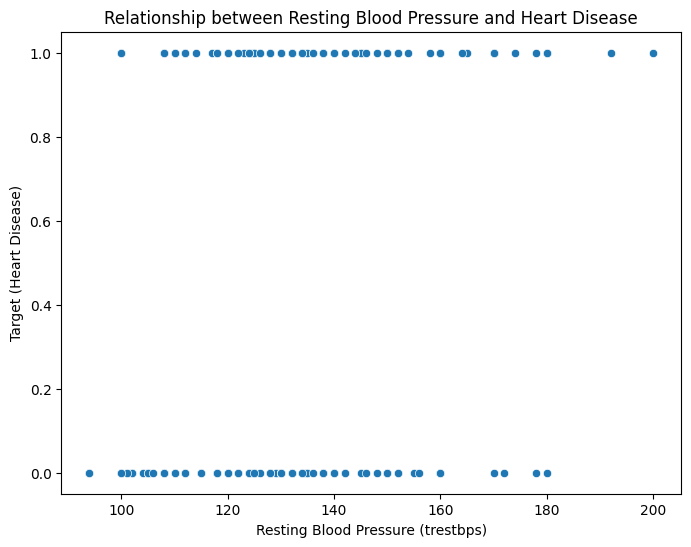

Correlation coefficient between trestbps and target: 0.15082544959450628


In [9]:

import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x='trestbps', y='target', data=heart)
plt.title('Relationship between Resting Blood Pressure and Heart Disease')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Target (Heart Disease)')
plt.show()


correlation = heart['trestbps'].corr(heart['target'])
print(f"Correlation coefficient between trestbps and target: {correlation}")

In [10]:
categoryfeature = ['cp', 'restecg', 'slope', 'ca', 'thal']
numericalfeature = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X = heart.drop(columns=['target'])
y = heart['target']

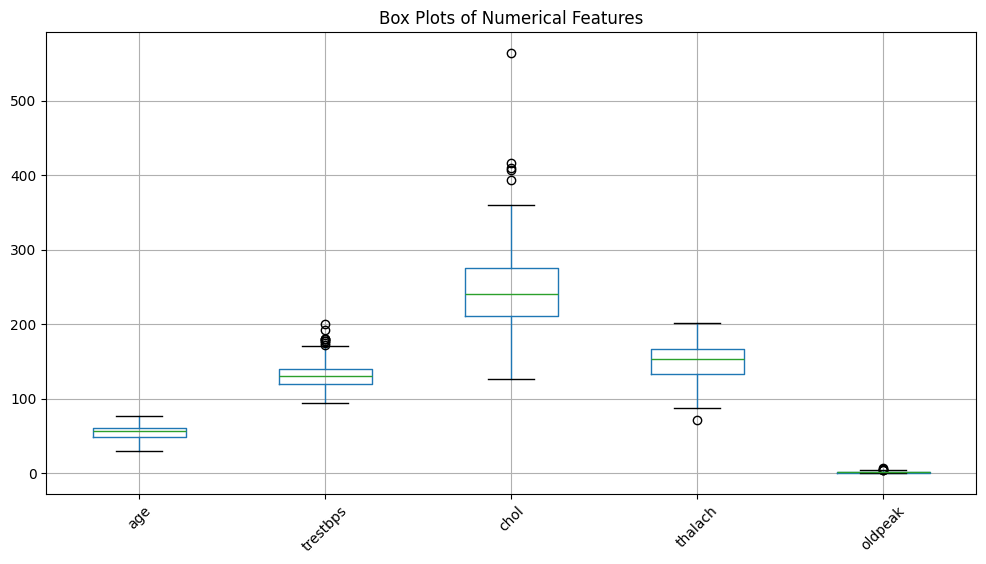

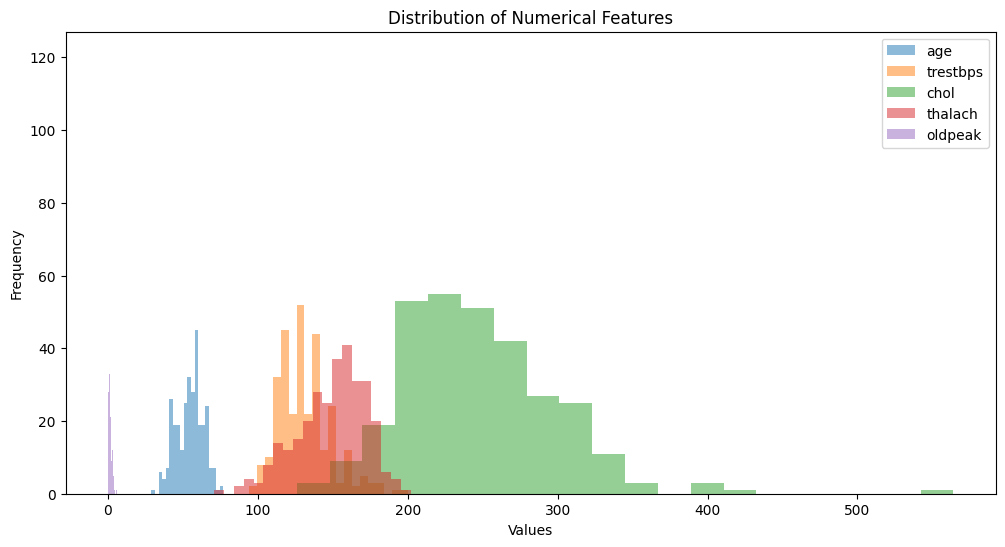

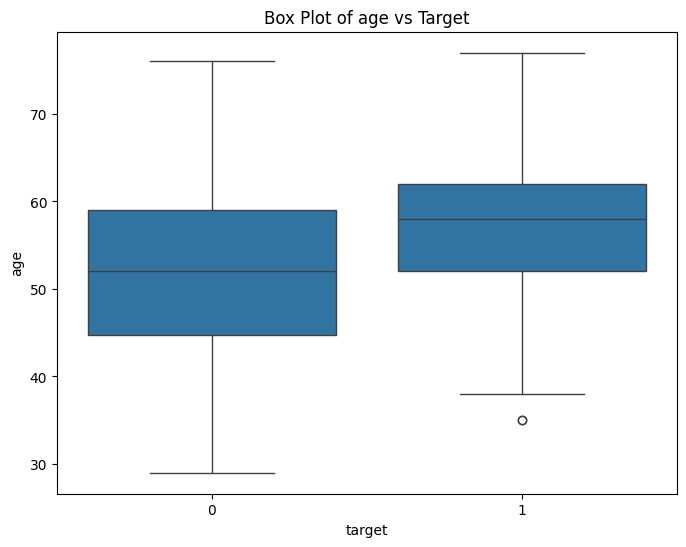

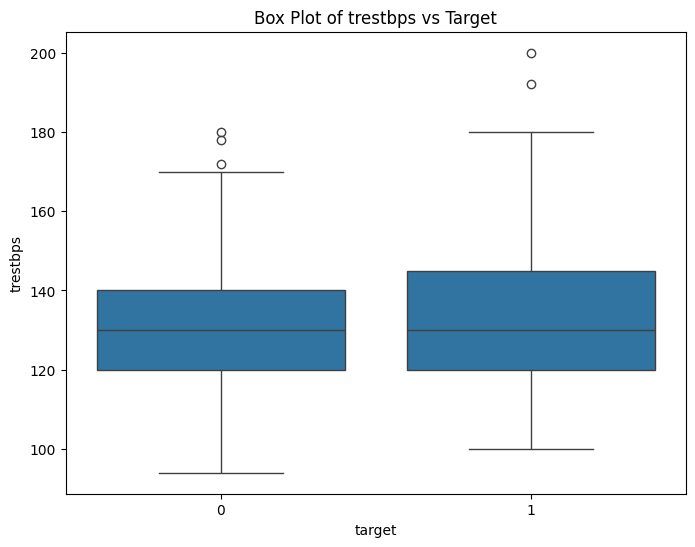

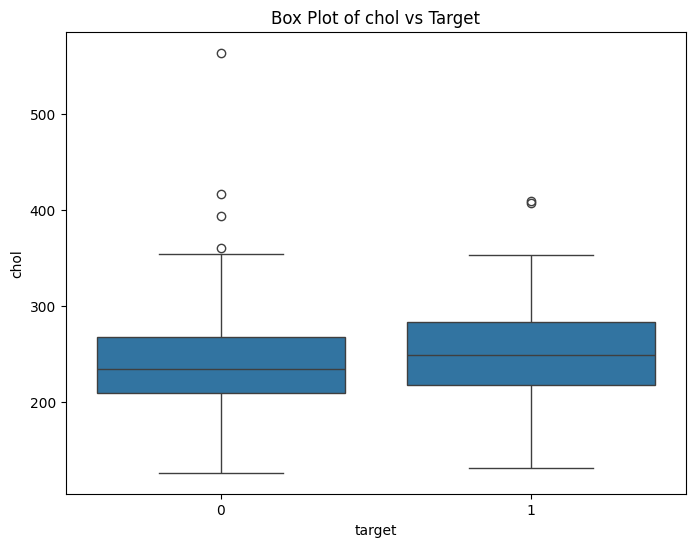

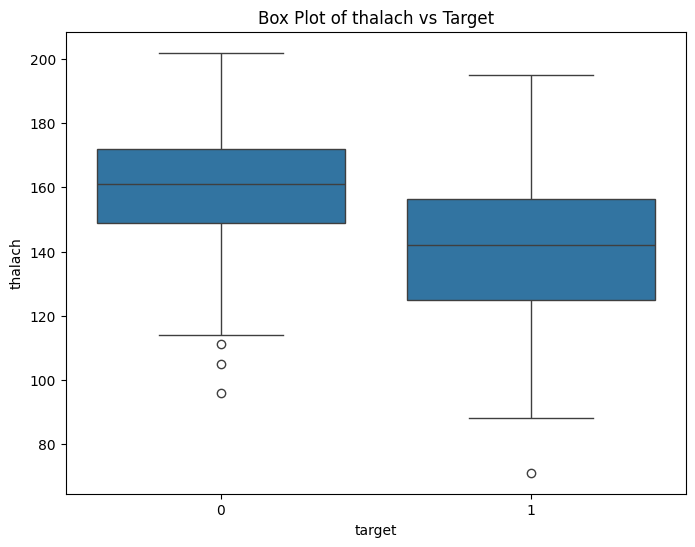

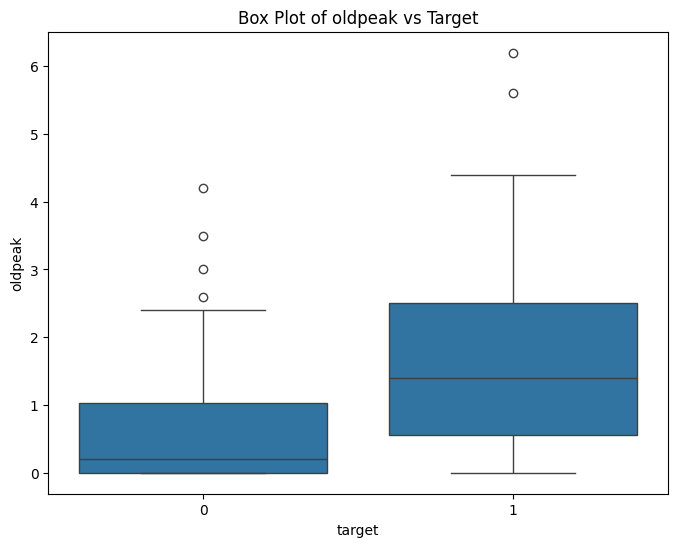

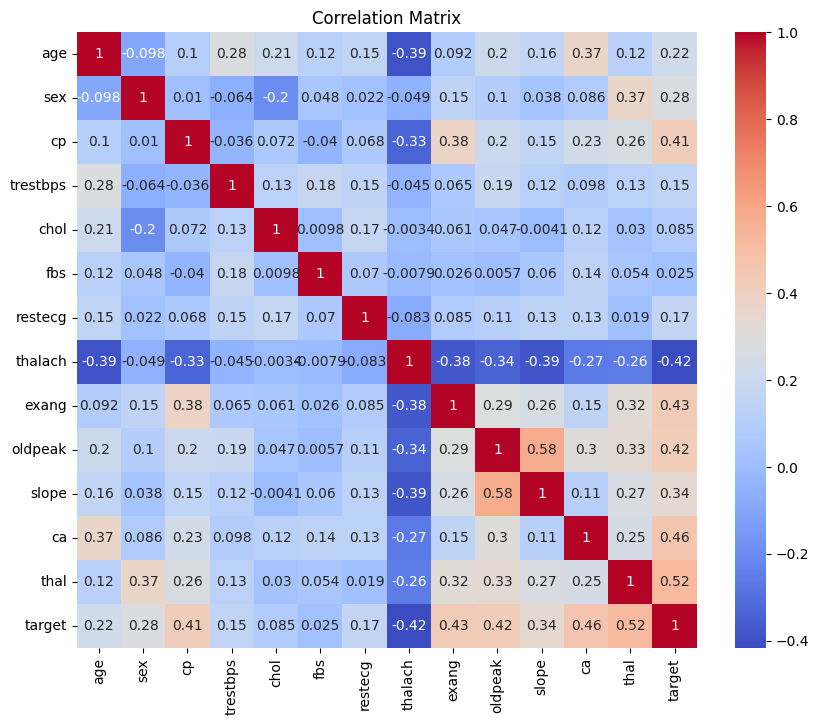

Potential Outliers in 'trestbps':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,2,172,199,1,0,162,0,0.5,0,0,3,0
83,68,1,2,180,274,1,2,150,1,1.6,1,0,3,1
126,56,0,3,200,288,1,2,133,1,4.0,2,2,3,1
172,59,0,3,174,249,0,0,143,1,0.0,1,0,1,1
183,59,1,0,178,270,0,2,145,0,4.2,2,0,3,0
188,54,1,1,192,283,0,2,195,0,0.0,0,1,3,1
201,64,0,3,180,325,0,0,154,1,0.0,0,0,1,0
213,66,0,3,178,228,1,0,165,1,1.0,1,2,3,1
231,55,0,3,180,327,0,1,117,1,3.4,1,0,1,1


In [11]:
plt.figure(figsize=(12, 6))
heart.boxplot(column=numericalfeature)
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
for feature in numericalfeature:
  plt.hist(heart[feature], bins=20, alpha=0.5, label=feature)
plt.title('Distribution of Numerical Features')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()



for col in numericalfeature:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=col, data=heart)
    plt.title(f'Box Plot of {col} vs Target')
    plt.show()


correlation_matrix = heart.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Q1 = heart['trestbps'].quantile(0.25)
Q3 = heart['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = heart[(heart['trestbps'] < lower_bound) | (heart['trestbps'] > upper_bound)]
print("Potential Outliers in 'trestbps':")
outliers

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numericalfeature),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoryfeature)
    ])

In [14]:
models = {

    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(
        random_state=60,
        criterion='gini',
        min_samples_leaf=5,
        min_weight_fraction_leaf=0.10),
    "Support Vector Machine": SVC(
        kernel='linear',
        C=1.0,
        random_state=50
    ),
    "GBC": GradientBoostingClassifier(n_estimators=150, learning_rate=0.5, random_state=42) ,



}

model_results = {}

In [15]:
for name, model in models.items():

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])


    pipeline.fit(X_train, y_train)


    y_pred = pipeline.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)


    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{class_report}\n")
    model_results[name] = {"Accuracy": accuracy, "Report": class_report}

Random Forest Accuracy: 0.8852459016393442
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61


Decision Tree Accuracy: 0.7704918032786885
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.82        33
           1       0.89      0.57      0.70        28

    accuracy                           0.77        61
   macro avg       0.80      0.76      0.76        61
weighted avg       0.80      0.77      0.76        61


Support Vector Machine Accuracy: 0.9016393442622951
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.

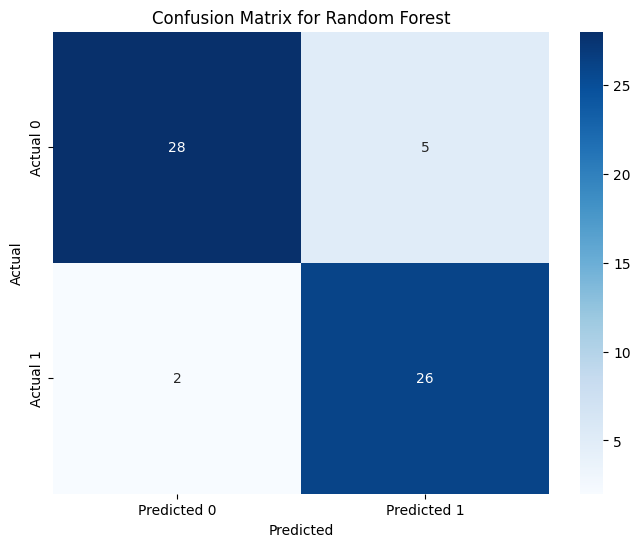

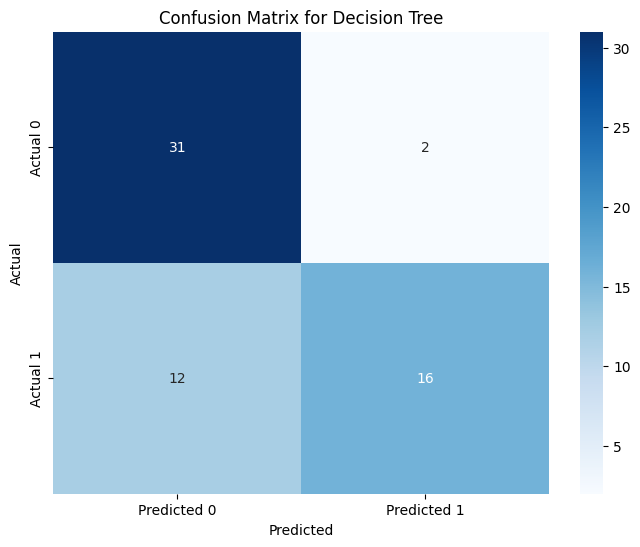

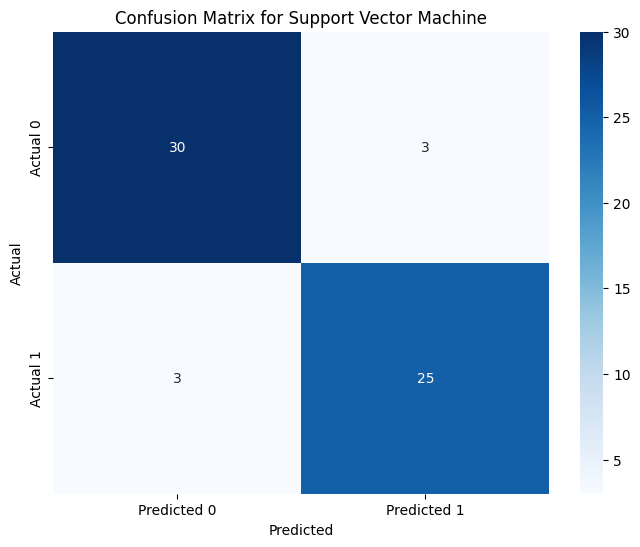

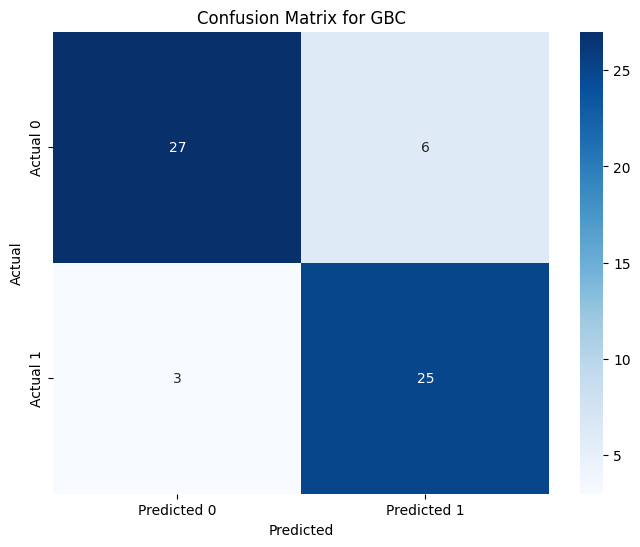

In [16]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [17]:
modelss = {

    "Elastic Net": ElasticNet(alpha=0.2, l1_ratio=0.3, random_state=42)
}

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

for name, model in modelss.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    if name == "Elastic Net":
      y_pred_class = np.round(y_pred)
      accuracy = accuracy_score(y_test, y_pred_class)
    else:
      accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy for {name}: {accuracy}")
    print(classification_report(y_test, y_pred if name != "Elastic Net" else y_pred_class ))



Accuracy for Elastic Net: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.89      0.86      0.87        28

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



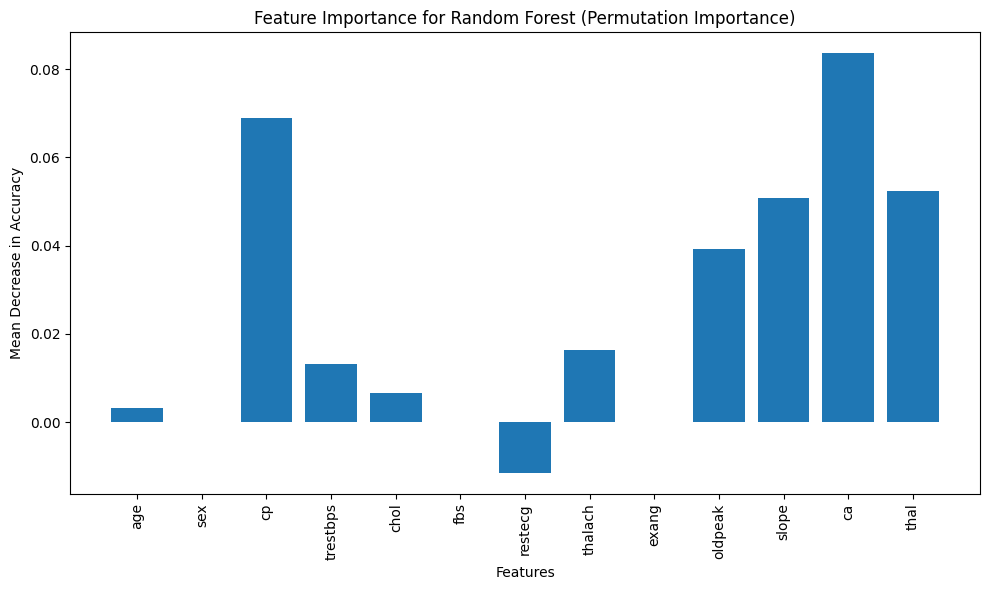

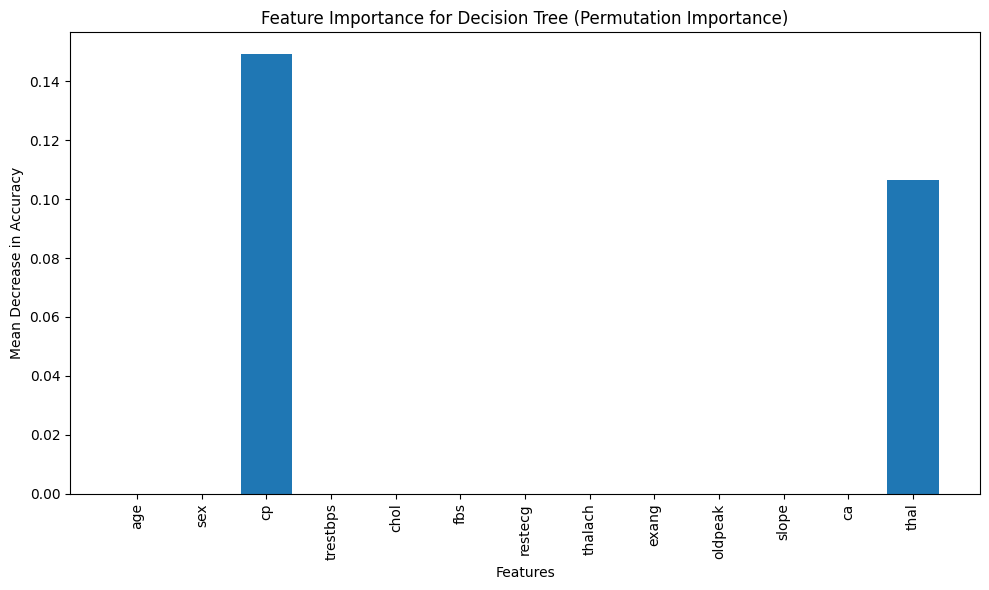

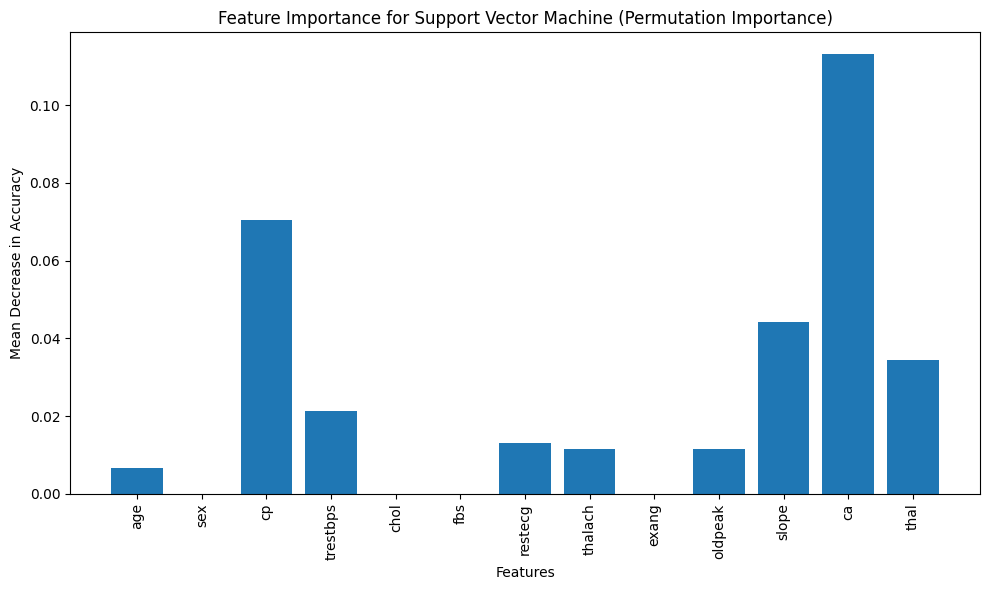

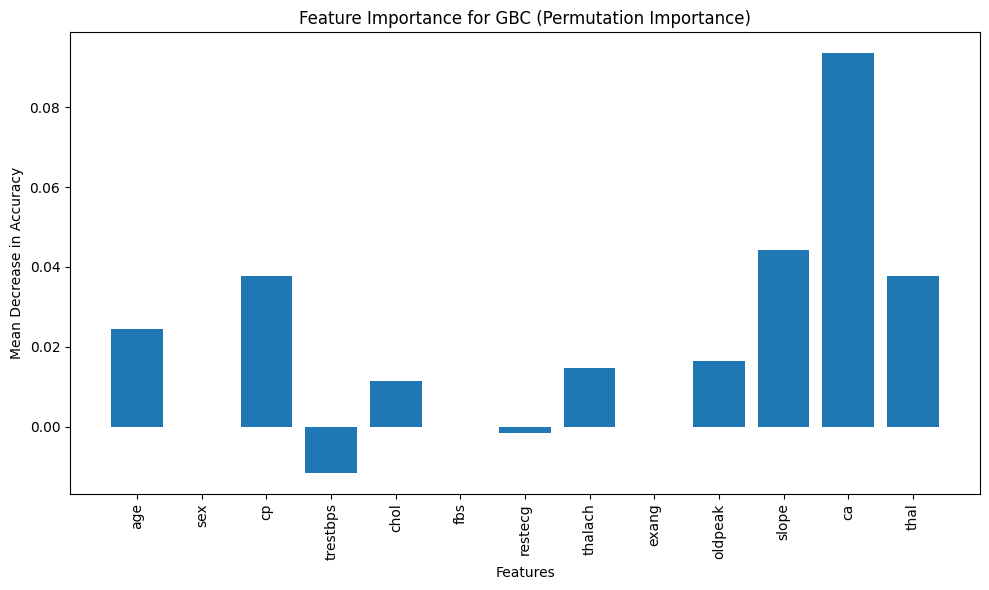

In [19]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)


    result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42)
    importance = result.importances_mean


    plt.figure(figsize=(10, 6))
    plt.bar(X_test.columns, importance)
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Mean Decrease in Accuracy')
    plt.title(f'Feature Importance for {name} (Permutation Importance)')
    plt.tight_layout()
    plt.show()

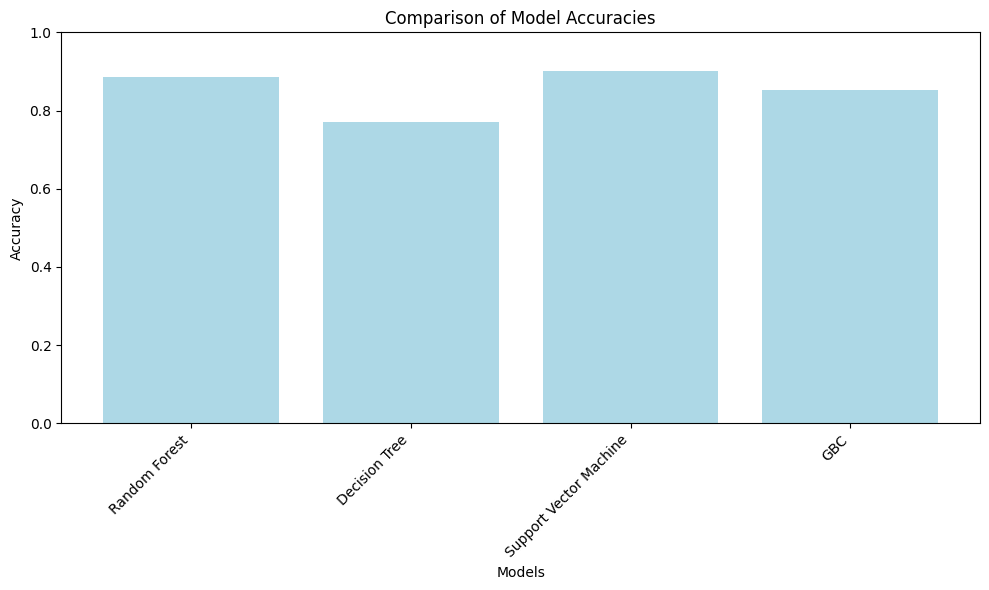

In [17]:
model_names = list(model_results.keys())
accuracies = [result["Accuracy"] for result in model_results.values()]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='lightblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.85


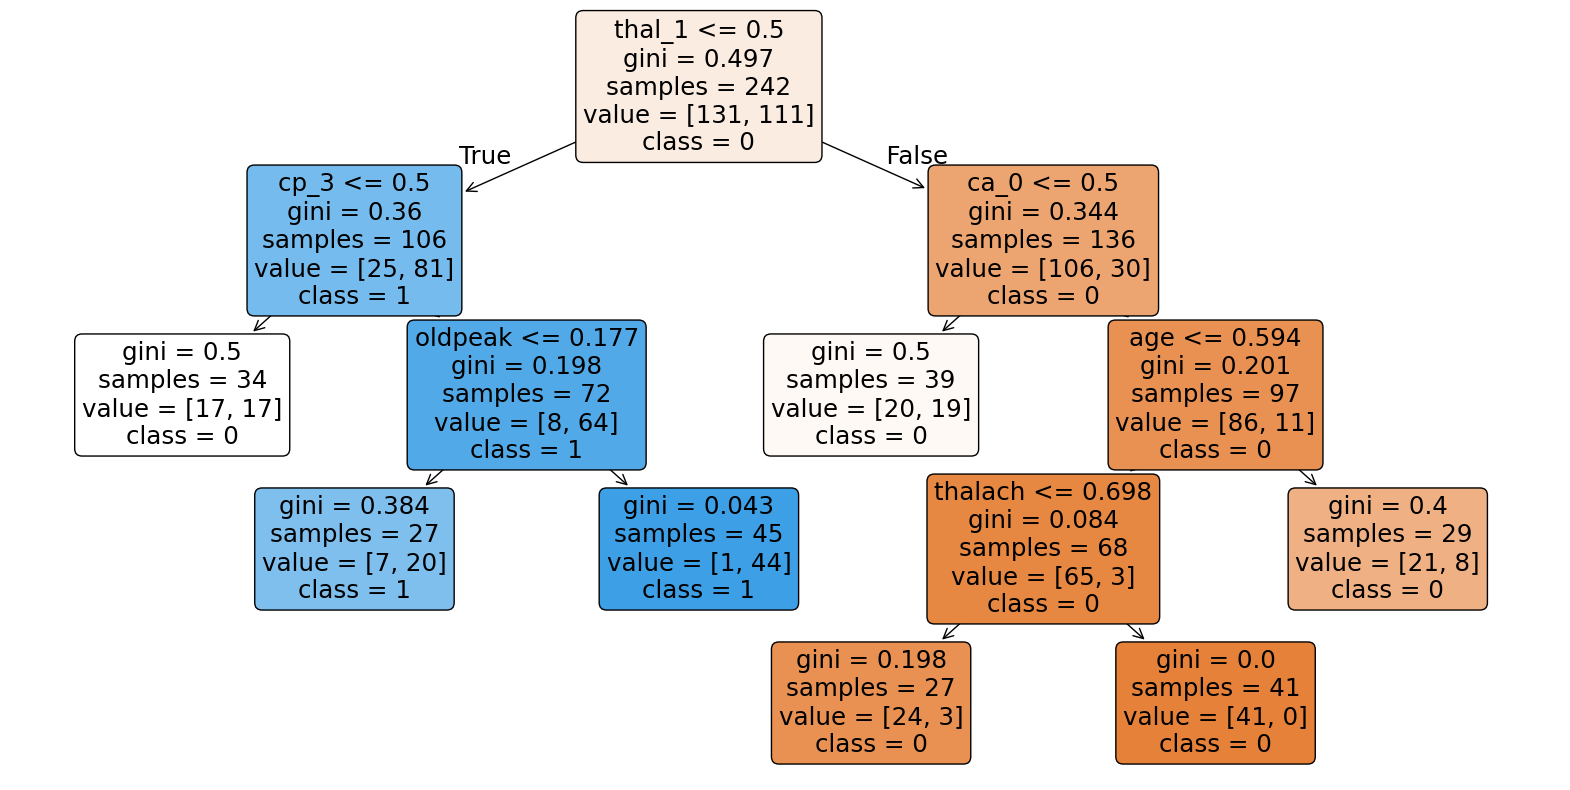

In [22]:
for name, model in models.items():
    if name == "Decision Tree":
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        pipeline.fit(X_train, y_train)

        plt.figure(figsize=(20, 10))
        plot_tree(pipeline['model'],
                  feature_names=numericalfeature + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categoryfeature)),
                  class_names=['0', '1'],
                  filled=True, rounded=True)
        plt.show()


In [ ]:

X_train_transformed = preprocessor.fit_transform(X_train)


feature_names = preprocessor.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)


print(X_train_transformed_df.head())

   num__age  num__trestbps  num__chol  num__thalach  num__oldpeak  cat__cp_0  \
0  0.395833       0.283019   0.337900      0.725191      0.080645        0.0   
1  0.541667       0.339623   0.310502      0.641221      0.000000        0.0   
2  0.520833       0.358491   0.369863      0.671756      0.000000        0.0   
3  0.520833       0.132075   0.417808      0.648855      0.000000        0.0   
4  0.583333       0.433962   0.262557      0.396947      0.032258        0.0   

   cat__cp_1  cat__cp_2  cat__cp_3  cat__restecg_0  ...  cat__slope_0  \
0        0.0        0.0        1.0             0.0  ...           0.0   
1        1.0        0.0        0.0             1.0  ...           1.0   
2        1.0        0.0        0.0             0.0  ...           1.0   
3        1.0        0.0        0.0             1.0  ...           1.0   
4        0.0        0.0        1.0             1.0  ...           0.0   

   cat__slope_1  cat__slope_2  cat__ca_0  cat__ca_1  cat__ca_2  cat__ca_3  \
0  

In [31]:
new_data = pd.DataFrame({
    'age': [68, 55, 70],
    'sex': [1, 0, 1],
    'cp': [2, 2, 1],
    'trestbps': [180, 120, 250],
    'chol': [250, 260, 200],
    'fbs': [3, 1, 0],
    'restecg': [2, 1, 2],
    'thalach': [150, 140, 140],
    'exang': [1, 1, 0],
    'oldpeak': [1.6, 1.0, 0.5],
    'slope': [1, 2, 0],
    'ca': [3, 2, 3],
    'thal': [1, 3, 1]
})


rf_model = models["Random Forest"]

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model)])


pipeline.fit(X_train, y_train)


y_pred_new = pipeline.predict(new_data)

print("Predictions for new data:")
print(y_pred_new)

Predictions for new data:
[1 1 0]
